<a href="https://colab.research.google.com/github/GomezIker/master-IA-ejercicios/blob/main/Actividad_1_master_IA_SCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#training_images.shape # 60000 imágenes de 28x28
#training_labels.shape # 60000 etiquetas entre 0 y 9
#test_images.shape # 10000 imágenes de 28x28
#test_labels.shape # 10000 etiquetas entre 0 y 9

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9 0
[[  0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 139 214 218 220 164 206 243 233 205  93   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 130 253 225 226 233 229 232 230 219 227 249  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 203 237 221 222 221 222 219 220 224 218 233 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 232 237 224 225 224 224 222 221 225 218 224 253   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 232 223 225 222 221 219 216 219 212 223 255  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 255 230 224 221 223 218 219 217 221 214 229 255  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  32 255 228 221 220 223 221 221 218 217 221 232 255 113   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  78 255 227 218 220 221 226 225 219 215 232 16

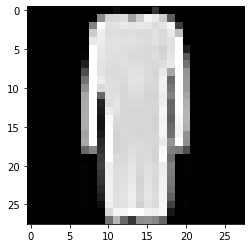

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[25], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels.max(), training_labels.min())
print(training_images[25])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [8]:
### Tu código para la red neuronal de la pregunta 1 aquí ###
from tensorflow import keras
from tensorflow.keras import layers

# La red se compone de 3 capas:
# - Una capa flatten que convierte la imagen en un array lineal
# - Una capa hidden con 128 neuronas
# - Una capa de salida con 10 valores
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8191 - accuracy: 0.7413
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4229 - accuracy: 0.8488
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3756 - accuracy: 0.8656
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3485 - accuracy: 0.8740
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3373 - accuracy: 0.8787
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3191 - accuracy: 0.8847
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3077 - accuracy: 0.8880
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2944 - accuracy: 0.8936
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2852 - accuracy: 0.8947
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2740 - accuracy: 0.9002

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [9]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
evaluate_loss, evaluate_acc = model.evaluate(test_images, test_labels)

print("Test Set Loss: ", evaluate_loss)
print("Test Set Accuracy", evaluate_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8779
Test Set Loss:  0.3382115066051483
Test Set Accuracy 0.8779000043869019


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [10]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)

print(classifications[0])

[3.8715989e-06 1.6357993e-06 6.5315203e-06 5.0678691e-06 7.7688683e-06 2.9453743e-02 1.2742274e-05 5.7291180e-02 3.7124116e-04 9.1284615e-01]


In [11]:
# Comprobamos que el máximo valor está en la posición 9 del array
print("Max value: ", classifications[0].max())
print("Position in array: ", classifications[0].argmax())

Max value:  0.91284615
Position in array:  9


Tu respuesta a la pregunta 3.1 aquí:

> Esto ocurre porque hemos especificado que la salida de nuestra red neuronal sea un vector de 10 valores, los cuales representan cada clase del dataset. (https://github.com/zalandoresearch/fashion-mnist#labels).
Los valores de este vector representan la probabilidad que tiene esa imagen de pertenecer a cada uno de las 10 clases que tenemos. La máxima de ellas será la clase a la que pertenece (según el modelo). 

Tu respuesta a la pregunta 3.2 aquí:

> La clase de la primera entrada es la clase 9, con un valor de 0.91284615, por lo que, basándonos en las etiquetas del dataset, pertenece a la clase "Ankle Boot"

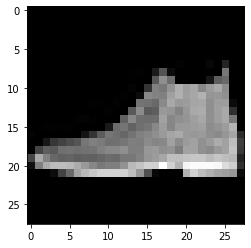

In [12]:
# Podemos comprobar como la imágen correspondiente a la 1ª entrada es efectivamente una "Ankle boot"
plt.imshow(test_images[0], cmap='gray')


# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [13]:
### Tu código para 512 neuronas aquí ###
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.7007 - accuracy: 0.7598
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.4181 - accuracy: 0.8492
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3678 - accuracy: 0.8673
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3365 - accuracy: 0.8789
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3137 - accuracy: 0.8866
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3015 - accuracy: 0.8873
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2843 - accuracy: 0.8957
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2651 - accuracy: 0.9026
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2562 - accuracy: 0.9056
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2445 - accuracy: 0.9091

In [14]:
### Tu código para 1024 neuronas aquí ###
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_3.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 9s 10ms/step - loss: 0.6665 - accuracy: 0.7637
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4164 - accuracy: 0.8509
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3689 - accuracy: 0.8656
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3384 - accuracy: 0.8761
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3081 - accuracy: 0.8868
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2944 - accuracy: 0.8899
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2778 - accuracy: 0.8968
Epoch 8/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2636 - accuracy: 0.9022
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2512 - accuracy: 0.9066
Epoch 10/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2367 - accuracy: 0

In [15]:
model.summary()
model_2.summary()
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
____________________________

Tu respuesta a la pregunta 4.3 aquí:

> El impacto inmediato que se observa es que el tiempo de entrenamiento aumenta considerablemente (casi doblando el tiempo de ejecución de cada epoch).
Por otro lado, vemos que al estudiar el summary() de cada red, pasamos de 101.770 parámetros, a 407.050 en la de 512 y 814.090 en la de 1024.
También vemos que el accuracy mejora unos pocos puntos en cada entrenamiento, segun vamos aumentando el número de neuronas, llegando a un accuracy del 90,91% en la red de 512 neuronas y un accuracy de 91,93% en la de 1024.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [16]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications_2 = model_2.predict(test_images)
classifications_3 = model_3.predict(test_images)

# Etiqueta del primer clasificador
print("Clasificador con 128 neuronas: ",classifications[0].argmax())

# Etiqueta del segundo
print("Clasificador con 512 neuronas: ",classifications_2[0].argmax())

# Etiqueta del tercero
print("Clasificador con 1024 neuronas: ",classifications_3[0].argmax())

Clasificador con 128 neuronas:  9
Clasificador con 512 neuronas:  9
Clasificador con 1024 neuronas:  9


Tu respuesta a la pregunta 5.1 aquí:

> En este caso, tanto el modelo de 512 como el de 1024 predicen la misma clase que el modelo de 128 (La clase 9, o "Ankle boot")

Tu respuesta a la pregunta 5.2 aquí:

> Al incluir más neuronas en la capa oculta, la predicción de ambos modelos debería mejorar. Y así es, como vemos, ambas mantienen la misma predicción que el modelo original.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [17]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
model_4 = keras.Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_4.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError: ignored

Tu respuesta a la pregunta 6 aquí:

> Al quitar la capa flatten, la capa de entrada de la red neuronal pasa a ser una capa con 128 neuronas (por lo que espera 128 valores), sin embargo, le estamos pasando imágenes (matrices) de 28x28, por lo que no sabe cómo actuar.


# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [18]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(5, activation='softmax')
])

model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_5.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError: ignored

Tu respuestas a la pregunta 7.1 aquí:

> Porque son 10 las etiquetas del dataset.

Tu respuestas a la pregunta 7.2 aquí:

> Nos devuelve un error de Argumento Inválido, debido a que el conjunto de entrenamiento tiene 10 etiquetas (de 0 a 9), pero el modelo entrenado, solo puede devolver 5 valores.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [19]:
### Tu código para 15 epoch aquí ###
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_6.fit(training_images, training_labels, epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.8327 - accuracy: 0.7357
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.4260 - accuracy: 0.8488
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3839 - accuracy: 0.8634
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3584 - accuracy: 0.8725
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3358 - accuracy: 0.8781
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3160 - accuracy: 0.8866
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3074 - accuracy: 0.8896
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2917 - accuracy: 0.8923
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2790 - accuracy: 0.8977
Epoch 10/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2783 - accuracy: 0.8979

In [20]:
### Tu código para 30 epoch aquí ###
model_7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_7.fit(training_images, training_labels, epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.8264 - accuracy: 0.7450
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.4226 - accuracy: 0.8489
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3763 - accuracy: 0.8661
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3493 - accuracy: 0.8741
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3291 - accuracy: 0.8793
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3118 - accuracy: 0.8867
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2998 - accuracy: 0.8913
Epoch 8/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2937 - accuracy: 0.8934
Epoch 9/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2818 - accuracy: 0.8972
Epoch 10/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2703 - accuracy: 0.9017

Tu respuesta a la pregunta 8.3 aquí:

> AL intentar minimizar la función de perdida, es probable que el modelo haya llegado a un mínimo local, produciendo esos "saltos". A este efecto se le llama over-fitting, significa que el modelo ha aprendido muy bien sobre los datos de entrada, pero no "generaliza" haciendo que la precisión no sea tan buena cuando le pasamos datos nuevos.



# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [21]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [22]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4):
              print("\nAlcanzado el 40% de pérdida, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.4.1
Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5920 - accuracy: 0.7914
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3699 - accuracy: 0.8666

Alcanzado el 40% de pérdida, se cancela el entrenamiento!!
